# Notebook 01: Basic Image Operations

Welcome to the first notebook in the Semantiva "Hands-On Introduction" series!

**In this notebook, you will:**
- Set up your environment in Jupyter
- Load and view images using Semantiva’s built-in tools
- Experiment with simple image algorithms (e.g., adding two images)
- Explore basic image probes
- Learn how to save or export processed images

This notebook provides a gentle introduction to single-image workflows in Semantiva.

---

   
### 1. **Environment Setup in Jupyter Notebooks**

To get started with Jupyter Notebooks, follow these steps to set up your environment:

1. **Install Jupyter Notebook**:
   If you haven't already installed Jupyter Notebook, you can do so using pip. Open your terminal and run:
   ```bash
   pip install notebook
   ```

2. **Install Semantiva**:
   To use the Semantiva package in your Jupyter Notebook, you need to install it. Run the following command in your terminal:
   ```bash
   pip install semantiva
   ```

3. **Launch Jupyter Notebook**:
   Once you have installed the necessary packages, you can launch Jupyter Notebook by running:
   ```bash
   jupyter notebook
   ```

4. **Create a New Notebook**:
   In the Jupyter Notebook interface, click on "New" and select "Python 3" to create a new notebook.

5. **Import Semantiva**:
   In your new notebook, you can now import the Semantiva package and start using it:
   ```python
   import semantiva
   ```

You are now ready to use Semantiva in your Jupyter Notebook environment!

### 2. **Images and Image sources in Semantiva**
    
In Semantiva, data sources are used to access data. These data sources are generally implemented as file readers or data generators/simulators. File readers are used to read data from existing files, while data generators/simulators create synthetic data for various purposes.

In this introduction, we use an image generator to create synthetic images. Specifically, we use the `TwoDGaussianImageGenerator` class. This class generates images based on a two-dimensional Gaussian distribution, allowing us to specify parameters such as the center, standard deviation, amplitude, and image size. This approach is useful for testing and experimentation without relying on external image files.


In [1]:
# Import the TwoDGaussianImageGenerator class from the image_loaders_savers_generators module
from semantiva.specializations.image.image_loaders_savers_generators import (
    TwoDGaussianImageGenerator,
)

# Generate the first image with specified parameters
# center: the center of the Gaussian distribution
# std_dev: the standard deviation of the Gaussian distribution
# amplitude: the amplitude of the Gaussian distribution
# image_size: the size of the generated image
image1 = TwoDGaussianImageGenerator.get_data(
    center=(512, 512), std_dev=40, amplitude=100, image_size=(1024, 1024)
)

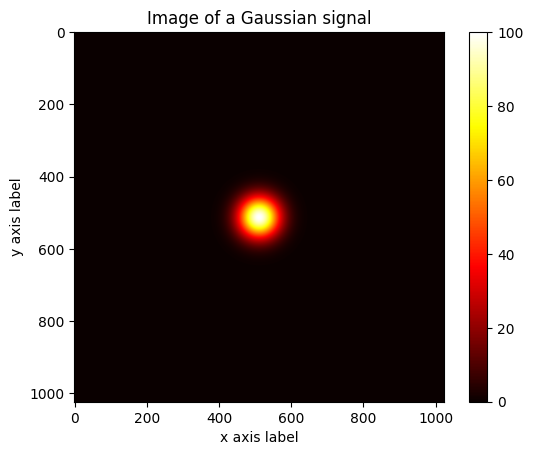

In [2]:
# Import the view_image module from semantiva.specializations.image
# This module provides functions to visualize images in Semantiva.
from semantiva.specializations.image import ImageViewer

# Display the generated Gaussian image.
# The display_image function is used to visualize our image, and it's enhanced here with customized
# title and axis labels to help explain the image's context as part of this hands-on introduction.
ImageViewer.view(
    image1,
    title="Image of a Gaussian signal",
    xlabel="x axis label",
    ylabel="y axis label",
    cmap="hot",
    colorbar=True,
)

### 3. Image Operations: Algorithms and Probes

In Semantiva, **data operations** are divided into two main categories:

1. **Algorithms**: Transform or modify data, generating new outputs.  
2. **Probes**: Inspect data without changing it, collecting metrics or insights.

This separation keeps the codebase clean and predictable—algorithms produce new or altered data, whereas probes simply gather information. By structuring operations this way, larger workflows can chain multiple transformations while maintaining clarity about where and when the data is actually modified versus analyzed.

---

#### **Interfaces for Data Operations**

A key design choice in Semantiva’s data operations is that the **first argument is always the primary data** being processed. **All subsequent arguments**—even if they are of data types themselves—are **treated as parameters**. This distinction becomes important in more advanced workflows, where parameters may have a different lifecycle or updating mechanism than the primary data. But for now, just note that whenever you see an operation function or class:

- The **first argument** is the main data source.  
- All **other arguments** are considered parameters, potentially including additional data objects, constants, or configuration values.

---

#### **Introducing the `ImageAddition` Algorithm**

A straightforward example of an algorithm is **`ImageAddition`**. It takes two images (where the **first** is the primary data, and the **second** is a parameter) and adds their corresponding pixel values, resulting in a new image. Conceptually:

1. **Inputs**:  
   - **`data=image1`** is the **primary data** being transformed.  
   - **`image_to_add=image2`** is provided as a **parameter**, even though it is itself an image.
2. **Operation**: Element-wise addition of pixel values  
3. **Output**: A new image containing the sum of corresponding pixel values from `image_A` and `image_B`

This might seem trivial, but it demonstrates how Semantiva handles transformations. The addition algorithm clearly changes the underlying data, so we categorize it under **Algorithms**.

---

#### **Probes vs. Algorithms: A Quick Comparison**

- **Algorithms**:  
  - **Goal**: Change or create new data (e.g., `ImageAddition`, resizing, thresholding).  
  - **Outputs**: Typically new or transformed data objects.  
  - **Method Signature**: First argument is the primary data, followed by parameters.

- **Probes**:  
  - **Goal**: Examine existing data for properties or metrics (e.g., brightness, histograms).  
  - **Outputs**: Numerical or descriptive metadata (no direct changes to the data itself).  
  - **Method Signature**: Same pattern (first argument is the main data, subsequent arguments are parameters).

By keeping the first argument strictly for the primary data source, Semantiva makes it easier to track how data moves through the system. The other arguments, even if they are of a data type, follow a **separate parameter logic** that will become clearer as you explore more complex workflows in future notebooks. 


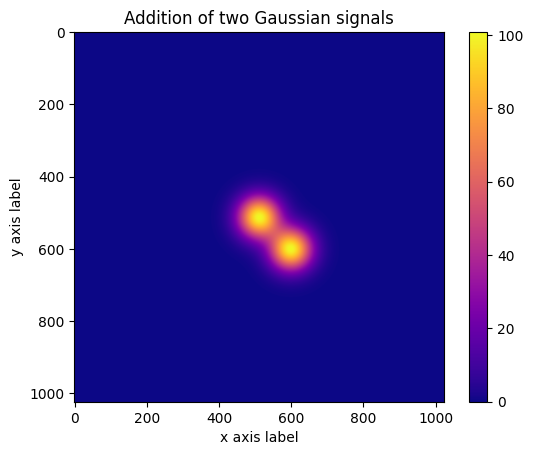

In [3]:
# Import the ImageAddition class, which exemplifies how an Algorithm transforms existing data.
# Note that in Semantiva, the first argument ('data') is the primary image,
# and subsequent arguments (even if they're also images) are treated as parameters.
from semantiva.specializations.image.image_algorithms import ImageAddition

# Generate the first image (our primary data) using a 2D Gaussian generator with specific parameters.
image1 = TwoDGaussianImageGenerator.get_data(
    center=(512, 512), std_dev=40, amplitude=100, image_size=(1024, 1024)
)

# Generate the second image, which we'll pass as a 'parameter' to the ImageAddition operation.
image2 = TwoDGaussianImageGenerator.get_data(
    center=(600, 600), std_dev=40, amplitude=100, image_size=(1024, 1024)
)

# Perform the image addition algorithm:
#  - 'data' is our primary image (image1)
#  - 'image_to_add' is the additional parameter (image2)
image3 = ImageAddition().run(data=image1, image_to_add=image2)

# Display the resulting image in the notebook.
ImageViewer.view(
    image3,
    title="Addition of two Gaussian signals",
    xlabel="x axis label",
    ylabel="y axis label",
    cmap="plasma",
    colorbar=True,
    log_scale=False,
)

### 4. Basic Image Probes

In Semantiva, **probes** are specialized operations that **analyze** an image without modifying it. Unlike **algorithms**, which generate new data, probes return extracted information—such as statistical properties or model parameters. 

Below, we explore two key probes available in Semantiva:

---

### 4.1 Exploring Key Image Properties: `BasicImageProbe`

The **`BasicImageProbe`** extracts essential image statistics, making it a useful tool for quick inspections. This probe computes:
- **Mean Intensity**: The average pixel value across the image.
- **Sum of Pixel Values**: The total intensity of all pixels.
- **Minimum and Maximum Intensity**: The lowest and highest pixel values in the image.

This information helps understand an image’s brightness, contrast, and overall intensity distribution before applying transformations.

#### **Example Usage**



In [4]:
from semantiva.specializations.image.image_probes import BasicImageProbe

# Probe the image for key statistical properties
probe_results = BasicImageProbe().run(data=image3)
print(probe_results)

{'mean': np.float64(1.9174759848570517), 'sum': np.float64(2010619.2982974679), 'min': np.float64(7.001515989747033e-70), 'max': np.float64(100.81961514907043)}


### 4.2 Introducing the 2D Gaussian Fitter: `TwoDGaussianFitterProbe`

For images containing **Gaussian-like patterns**, the **`TwoDGaussianFitterProbe`** estimates the best-fitting **2D Gaussian function** and extracts key parameters:
- **Center (`x`, `y`)**: The estimated peak position of the Gaussian.
- **Amplitude**: The maximum intensity of the fitted Gaussian.
- **Standard Deviations (`σ_x`, `σ_y`)**: The spread of the Gaussian in the x and y directions.
- **Residual Error**: A measure of how well the fitted model matches the image data.

In [5]:
from semantiva.specializations.image.image_probes import TwoDGaussianFitterProbe

# Create an instance of TwoDGaussianFitterProbe and fit a 2D Gaussian model to image1.
# The fitting process estimates parameters such as the peak center, amplitude, and standard deviations.
fit_results = TwoDGaussianFitterProbe().run(data=image1)

# Print the results of the Gaussian fitting.
print(fit_results)

{'peak_center': (np.float64(512.0), np.float64(512.0)), 'amplitude': np.float64(100.0), 'std_dev_x': np.float64(40.0), 'std_dev_y': np.float64(40.0), 'r_squared': np.float64(1.0)}



---

### Probes vs. Algorithms: A Key Difference

| Feature  | **Algorithms** | **Probes** |
|----------|--------------|------------|
| **Purpose**  | Modify or generate new data | Extract information from existing data |
| **Output**   | A new image or transformed dataset | Metadata, statistics, or model parameters |
| **Effect on Data** | Changes or transforms the input | Leaves input unchanged |
| **Examples** | `ImageAddition`, `ImageCropper` | `BasicImageProbe`, `TwoDGaussianFitterProbe` |

By keeping **transformations (Algorithms) and inspections (Probes) separate**, Semantiva ensures clarity in image workflows. This distinction becomes even more important when integrating operations into **pipelines**, which we will explore in later notebooks.

### 5. Understanding the Topology of Data Operations

In Semantiva, each **Data Operation** has a well-defined **topology**, which consists of:
- **Input Data Type**: The expected format of the primary data.
- **Output Data Type**: The format of the transformed result.
- **Parameters & Type Hints**: Additional arguments that influence the operation, along with their expected data types.

Understanding the topology of an operation is **essential for integrating it into pipelines**, ensuring smooth compatibility between different operations.

---

#### **Inspecting the Topology of `ImageAddition`**

The **`ImageAddition`** operation performs **pixel-wise addition** between images.  
We can inspect its topology to confirm:
1. **What data types it accepts as input**
2. **What data type it outputs**
3. **What parameters it requires, and their expected types**

To inspect an operation’s topology, use:

```python
from semantiva.specializations.image.image_algorithms import ImageAddition

# Print the operation's structured signature
print(ImageAddition.signature_string())
```

**Expected Output:**
```
ImageAddition
---------------
    Input Type:  ImageDataType
    Output Type: ImageDataType
    Parameters:
        - image_to_add: ImageDataType
```

This confirms that:
- `ImageAddition` **requires an image as input (`ImageDataType`)**.
- It **produces an image (`ImageDataType`)** as output.
- The **`image_to_add`** parameter **must also be an `ImageDataType`**.

---

#### **Understanding Probes in Semantiva**
Apart from transformations (like `ImageAddition`), **probes** in Semantiva **analyze data without modifying it**.  

For example, **`TwoDGaussianFitterProbe`** is a probe that **fits a 2D Gaussian model** to an image and extracts parameters.  
We can inspect its signature as follows:

```python
from semantiva.specializations.image.image_probes import TwoDGaussianFitterProbe

# Print the probe's structured signature
print(TwoDGaussianFitterProbe.signature_string())
```

**Expected Output:**
```
TwoDGaussianFitterProbe
---------------
    Input Type:  ImageDataType
    Parameters: None
```

This tells us that `TwoDGaussianFitterProbe`
- expects **an image as input** (`ImageDataType`).
- Does not use any parameter 
---

#### **Why Does This Matter?**
- **Pipeline Compatibility**: Knowing an operation’s input/output types helps ensure it integrates smoothly into a workflow.
- **Automatic Validations**: Semantiva enforces these type definitions, preventing invalid operations (e.g., adding an image to a non-image object).
- **Clear Workflow Logic**: Separating **primary data** (input/output) from **parameters** (modifiers) maintains consistency across different operations.

Understanding the topology of operations and probes is a foundational step before constructing **pipelines**, which we will explore in later sections.

In [6]:
from semantiva.specializations.image.image_algorithms import ImageAddition
from semantiva.specializations.image.image_probes import TwoDGaussianFitterProbe

# Inspecting the signature of `ImageAddition`
print(ImageAddition.signature_string())

# Inspecting the signature of `TwoDGaussianFitterProbe`
print(TwoDGaussianFitterProbe.signature_string())

ImageAddition (DataAlgorithm)
	Input Type:  ImageDataType
	Output Type: ImageDataType
	Parameters:
	    - image_to_add: ImageDataType

TwoDGaussianFitterProbe (DataProbe)
	Input Type:  ImageDataType
	Parameters: None



### 6. **Saving Images**

Once an image has been processed, it is often necessary to save the results for later analysis, visualization, or integration with other workflows. Semantiva provides specialized **Data Savers** to handle different output formats. The choice of format depends on the intended use—whether for visualization, archival, or further computational processing.

---

#### **6.1 Saving as PNG for Visualization: `PngImageSaver`**

The **PNG format** is widely used for visualization because:
- It is a compressed format that maintains high visual fidelity.
- It is easily viewable in most operating systems and applications.
- It supports grayscale and color images.

However, **PNG is limited to 8-bit or 16-bit depth**, which may not be sufficient for high-precision scientific imaging.

##### **Example: Saving an Image as PNG**

In [7]:
from semantiva.specializations.image.image_loaders_savers_generators import (
    PngImageSaver,
)

# Define the file path
output_path = "output_image.png"

# Save the image
PngImageSaver().send_data(data=image3, path=output_path)

print(f"Image saved successfully at {output_path}")

Image saved successfully at output_image.png


#### **6.2 Saving as NPZ for Scientific Imaging: `NpzImageDataSaver`**

For **scientific applications**, saving in **NPZ format (NumPy compressed arrays)** is often preferred because:
- It **preserves full floating-point precision** (32-bit or 64-bit).
- It **retains exact pixel values**, unlike PNG, which can introduce rounding.
- It **allows efficient storage of multi-image datasets** in a single file.

##### **Example: Saving an Image as NPZ**


In [8]:
from semantiva.specializations.image.image_loaders_savers_generators import (
    NpzImageDataSaver,
)

# Define the file path
output_path = "output_image.npz"

# Save the image
NpzImageDataSaver().send_data(data=image3, path=output_path)

print(f"Scientific image data saved successfully at {output_path}")

Scientific image data saved successfully at output_image.npz


---

### **Choosing Between PNG and NPZ**
| **Format** | **Best For** | **Bit Depth** | **Compression** | **Readability** |
|------------|-------------|--------------|----------------|----------------|
| **PNG** | Visualization, reports | 8-bit / 16-bit | Lossless, but limited precision | Easily viewable |
| **NPZ** | Scientific imaging, analysis | 32-bit / 64-bit | Highly efficient for large datasets | Requires NumPy for reading |

If your workflow involves further computations, **NPZ is the recommended format**, as it ensures no loss of precision. However, if you need quick visual verification, **PNG provides a convenient alternative**.

By understanding how to save images in different formats, you ensure that your processed results remain useful, whether for human inspection or automated analysis.
